# Run DESeq2 on Ernst et al data

Basically a script to run DESeq2 on the SHARPR data.
See make_counts_table_kellis.py to see how the input tables were generated.

Interesting findings

1. Many oligos have statistically significant differences between cell types.
2. SV40P shows more sig repressing oligos, as expected.
3. Overall minP has fewer sig.

In [17]:
library('DESeq2')
DATA_DIR <- "../enhancer_data/kellis/counts"
OUT_DIR  <- "../enhancer_data/kellis/de"

In [8]:
counts_sv40p_1 = read.table(paste(DATA_DIR, "ScaleUpDesign1-SV40P.counts", sep = '/'), sep = '\t',
                    header = 1, row.names = 'ID')
counts_sv40p_2 = read.table(paste(DATA_DIR, "ScaleUpDesign2-SV40P.counts", sep = '/'), sep = '\t',
                    header = 1, row.names = 'ID')
counts_minp_1 = read.table(paste(DATA_DIR, "ScaleUpDesign1-minP.counts", sep = '/'), sep = '\t',
                    header = 1, row.names = 'ID')
counts_minp_2 = read.table(paste(DATA_DIR, "ScaleUpDesign2-minP.counts", sep = '/'), sep = '\t',
                    header = 1, row.names = 'ID')
head(counts_minp_1)

,DNA,HepG2.RNA1,K562.RNA1,HepG2.RNA2,K562.RNA2
H1hesc_1_0_0_chr20_30310735,104,16,0,165,0
H1hesc_1_0_1_chr20_30310735,15,0,0,13,0
H1hesc_1_0_2_chr20_30310735,1,0,1,0,0
H1hesc_1_0_3_chr20_30310735,8,7,0,0,0
H1hesc_1_0_4_chr20_30310735,7,0,0,0,0
H1hesc_1_0_5_chr20_30310735,7,0,1,1,0


In [9]:
colData <- data.frame(row.names = colnames(counts_sv40p_1)[1:5])
colData['condition'] = c('dna',
                         'hepg2-rna', 'k562-rna',
                         'hepg2-rna', 'k562-rna')
colData['type'] = c('single-read',
                    'single-read', 'single-read',
                    'single-read', 'single-read')
colData

,condition,type
DNA,dna,single-read
HepG2.RNA1,hepg2-rna,single-read
K562.RNA1,k562-rna,single-read
HepG2.RNA2,hepg2-rna,single-read
K562.RNA2,k562-rna,single-read


In [10]:
dds_sv40p_1 <- DESeqDataSetFromMatrix(countData = counts_sv40p_1,
                              colData = colData,
                              design = ~condition)
dds_sv40p_2 <- DESeqDataSetFromMatrix(countData = counts_sv40p_2,
                              colData = colData,
                              design = ~condition)
dds_minp_1 <- DESeqDataSetFromMatrix(countData = counts_minp_1,
                              colData = colData,
                              design = ~condition)
dds_minp_2 <- DESeqDataSetFromMatrix(countData = counts_minp_2,
                              colData = colData,
                              design = ~condition)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”

using pre-existing size factors
estimating dispersions
found already estimated dispersions, replacing these
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


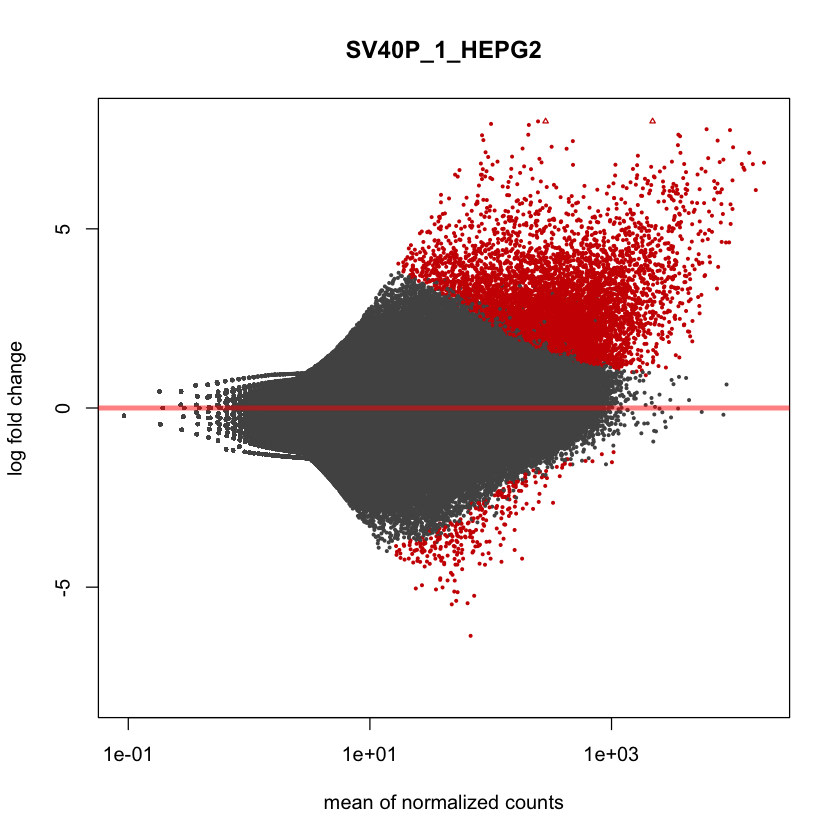

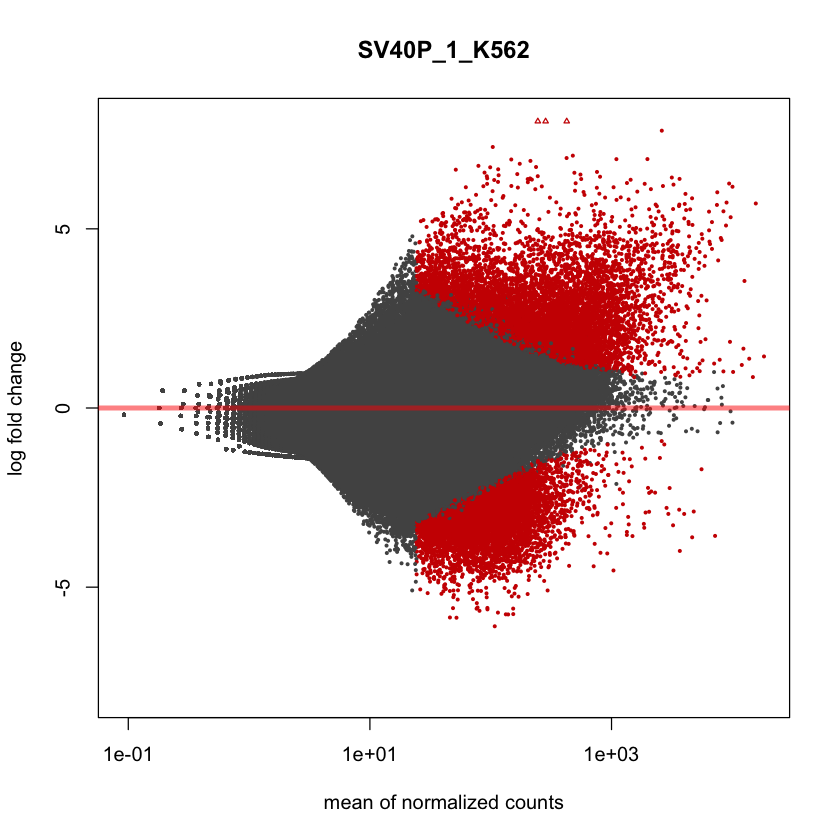

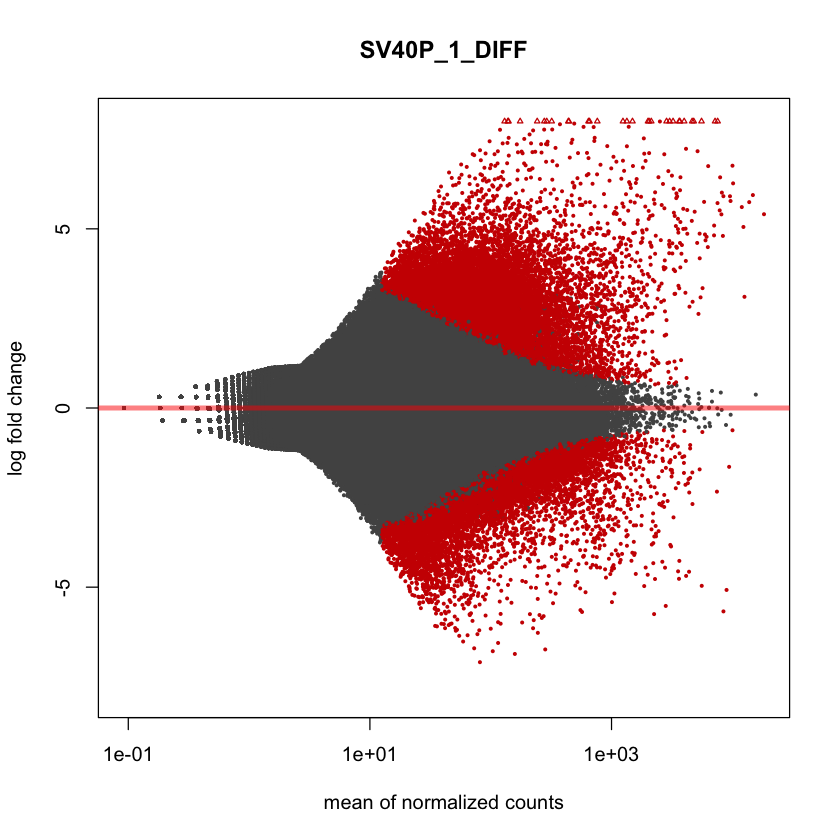

In [13]:
dds_sv40p_1 <- DESeq(dds_sv40p_1)
res_sv40p_1_hepg2 <- results(dds_sv40p_1, addMLE = TRUE, contrast=c('condition',
                                            'hepg2-rna', 'dna'))
res_sv40p_1_k562 <- results(dds_sv40p_1, addMLE = TRUE, contrast=c('condition',
                                            'k562-rna', 'dna'))
res_sv40p_1_diff <- results(dds_sv40p_1, addMLE = TRUE, contrast=c('condition',
                                            'hepg2-rna', 'k562-rna'))
plotMA(res_sv40p_1_hepg2, main="SV40P_1_HEPG2", ylim=c(-8,8))
plotMA(res_sv40p_1_k562,  main="SV40P_1_K562",  ylim=c(-8,8))
plotMA(res_sv40p_1_diff,  main="SV40P_1_DIFF",  ylim=c(-8,8))

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


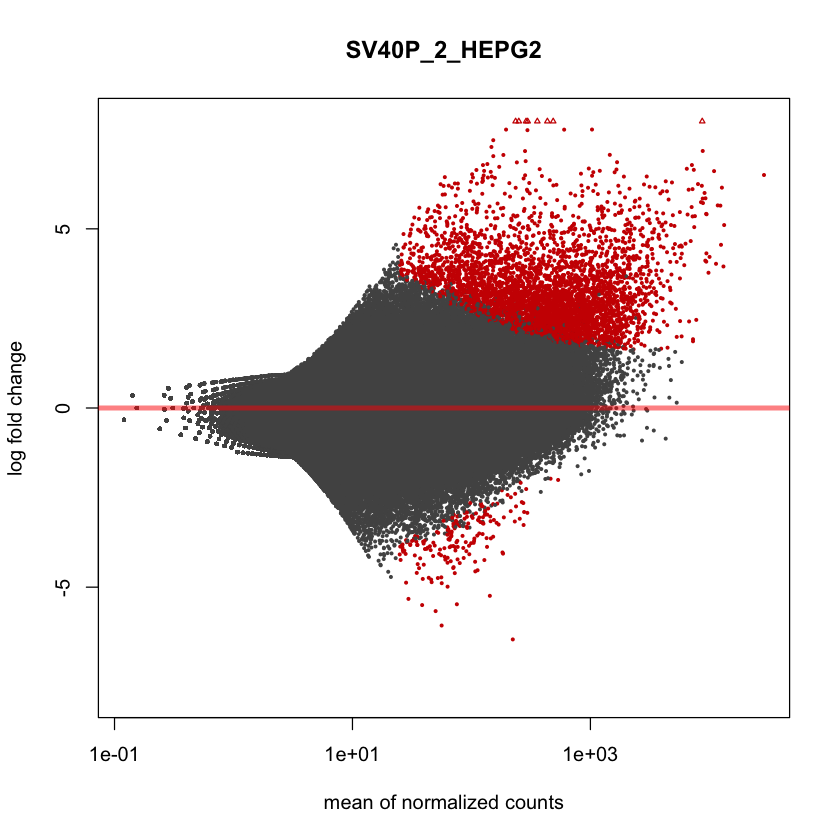

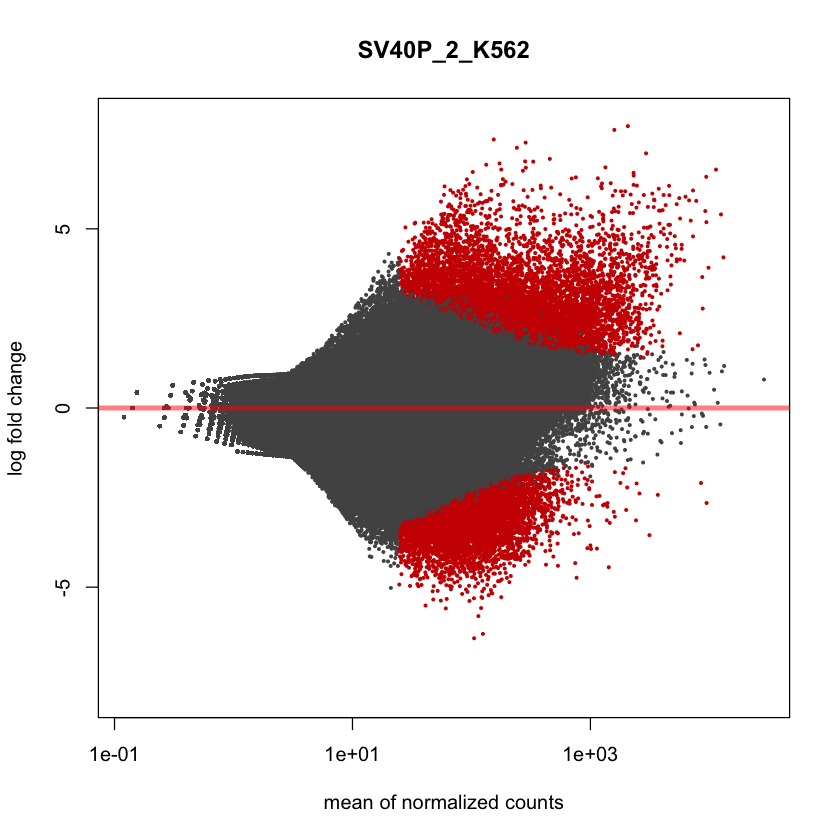

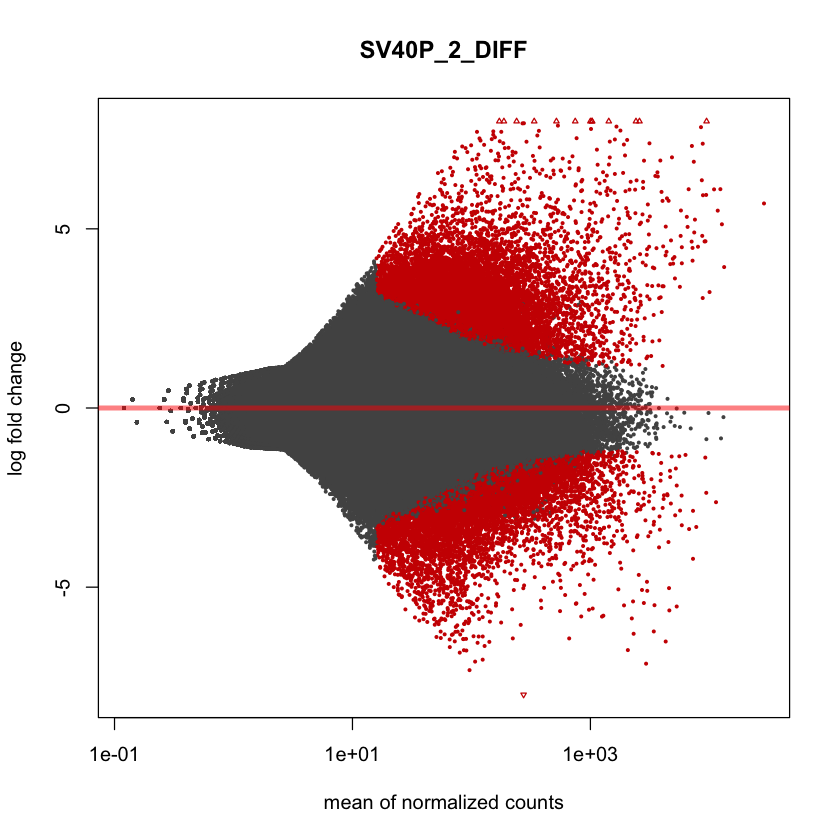

In [14]:
dds_sv40p_2 <- DESeq(dds_sv40p_2)
res_sv40p_2_hepg2 <- results(dds_sv40p_2, addMLE = TRUE, contrast=c('condition',
                                            'hepg2-rna', 'dna'))
res_sv40p_2_k562 <- results(dds_sv40p_2, addMLE = TRUE, contrast=c('condition',
                                            'k562-rna', 'dna'))
res_sv40p_2_diff <- results(dds_sv40p_2, addMLE = TRUE, contrast=c('condition',
                                            'hepg2-rna', 'k562-rna'))
plotMA(res_sv40p_2_hepg2, main="SV40P_2_HEPG2", ylim=c(-8,8))
plotMA(res_sv40p_2_k562,  main="SV40P_2_K562",  ylim=c(-8,8))
plotMA(res_sv40p_2_diff,  main="SV40P_2_DIFF",  ylim=c(-8,8))

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


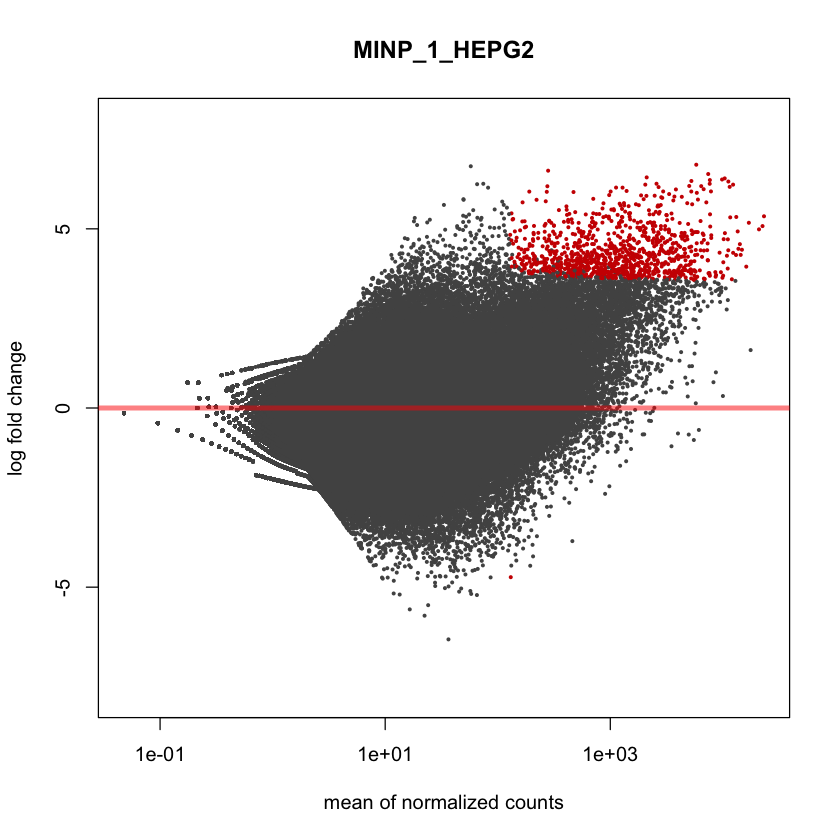

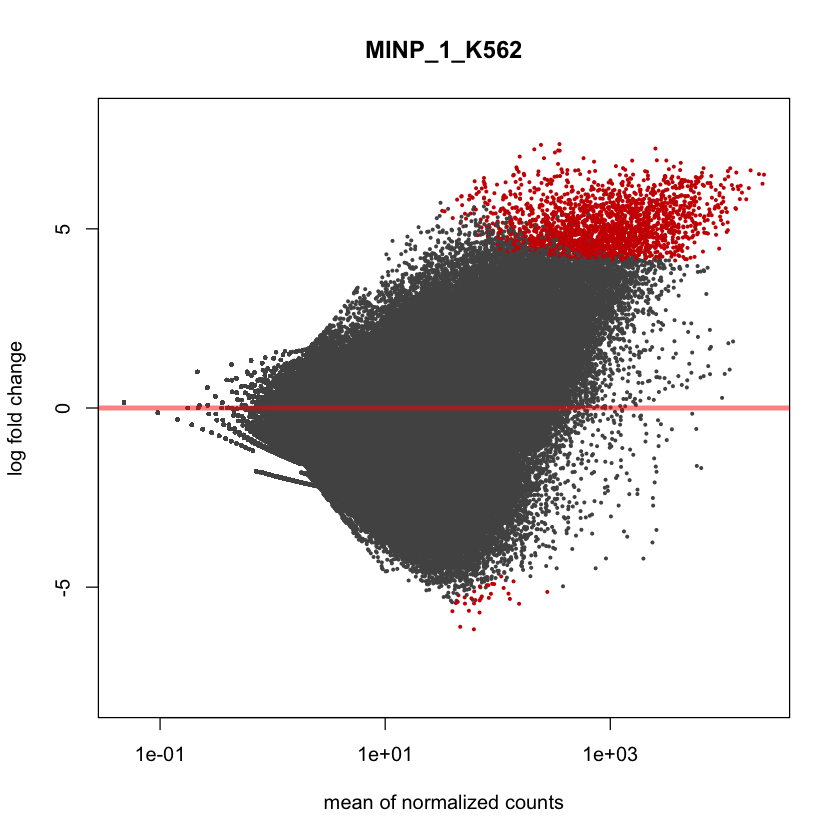

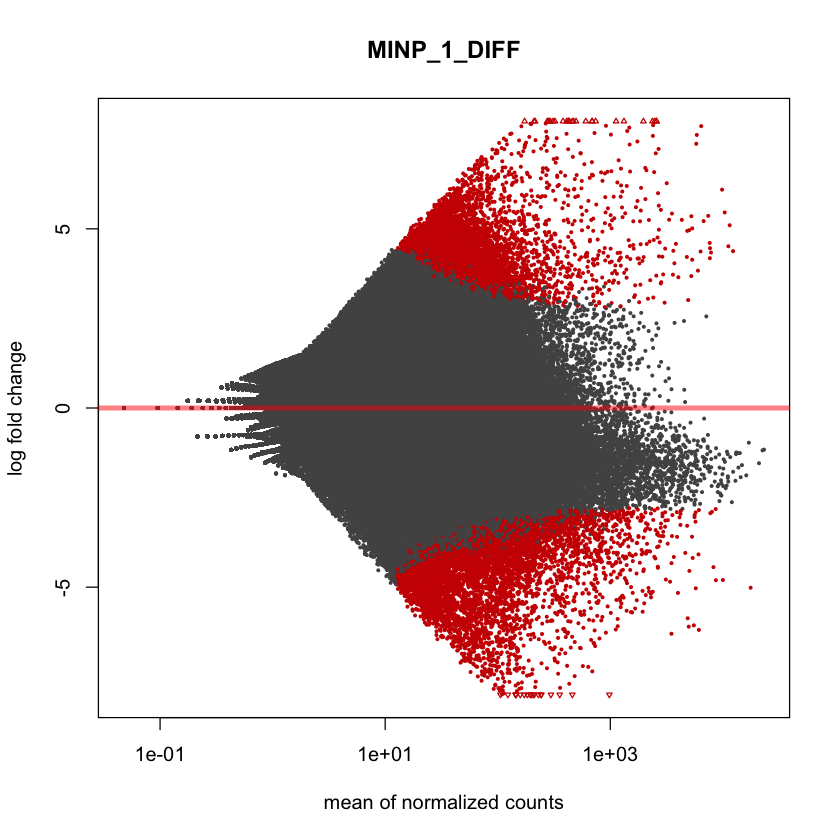

In [15]:
dds_minp_1 <- DESeq(dds_minp_1)
res_minp_1_hepg2 <- results(dds_minp_1, addMLE = TRUE, contrast=c('condition',
                                            'hepg2-rna', 'dna'))
res_minp_1_k562 <- results(dds_minp_1, addMLE = TRUE, contrast=c('condition',
                                            'k562-rna', 'dna'))
res_minp_1_diff <- results(dds_minp_1, addMLE = TRUE, contrast=c('condition',
                                            'hepg2-rna', 'k562-rna'))
plotMA(res_minp_1_hepg2, main="MINP_1_HEPG2", ylim=c(-8,8))
plotMA(res_minp_1_k562,  main="MINP_1_K562",  ylim=c(-8,8))
plotMA(res_minp_1_diff,  main="MINP_1_DIFF",  ylim=c(-8,8))

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


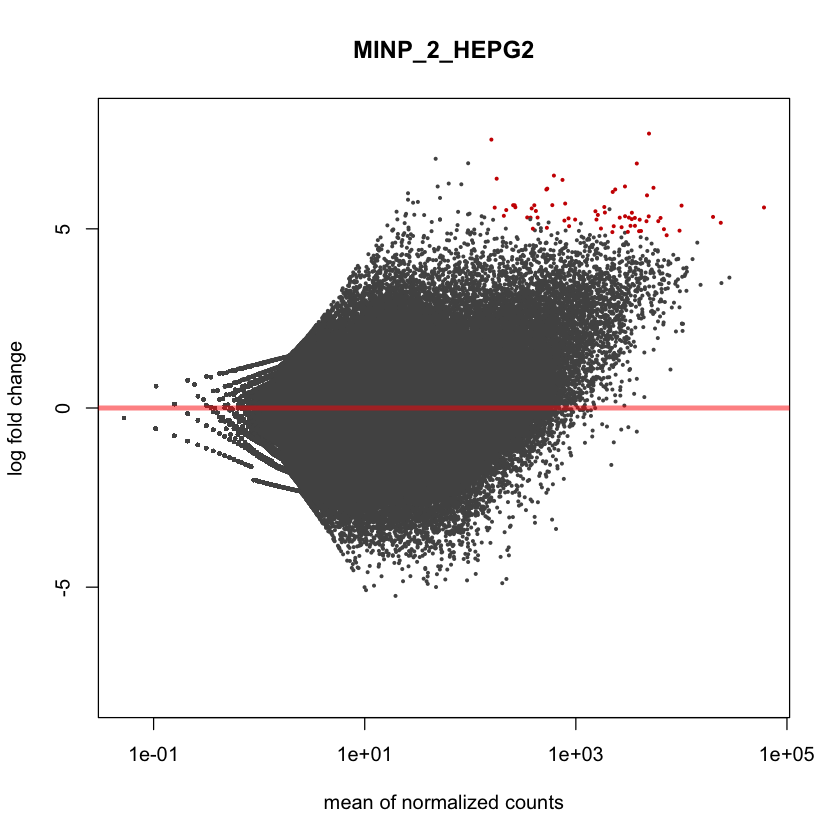

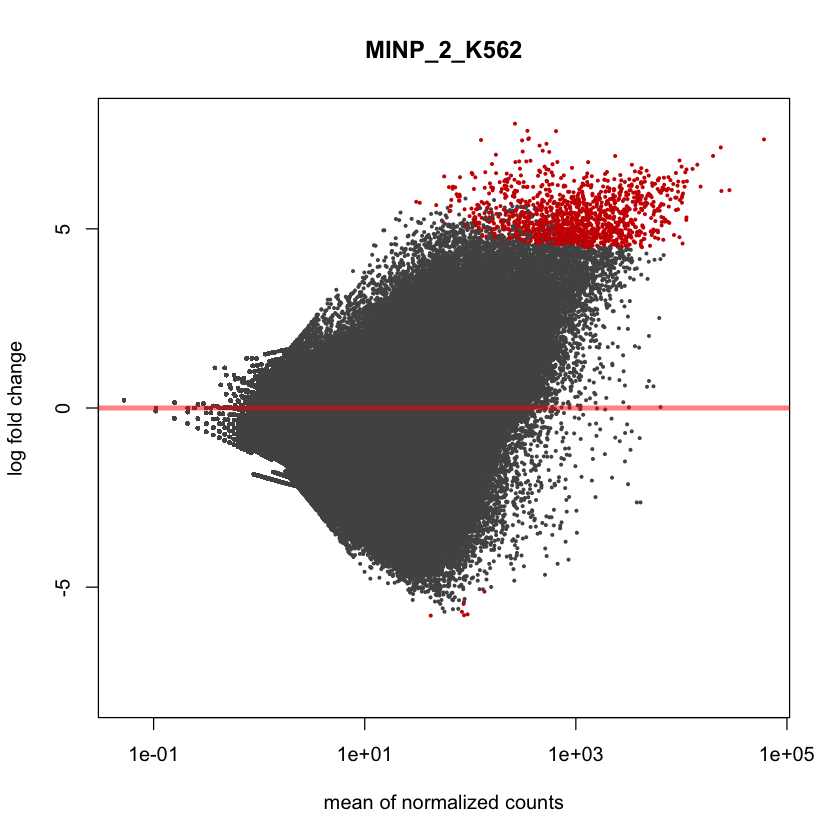

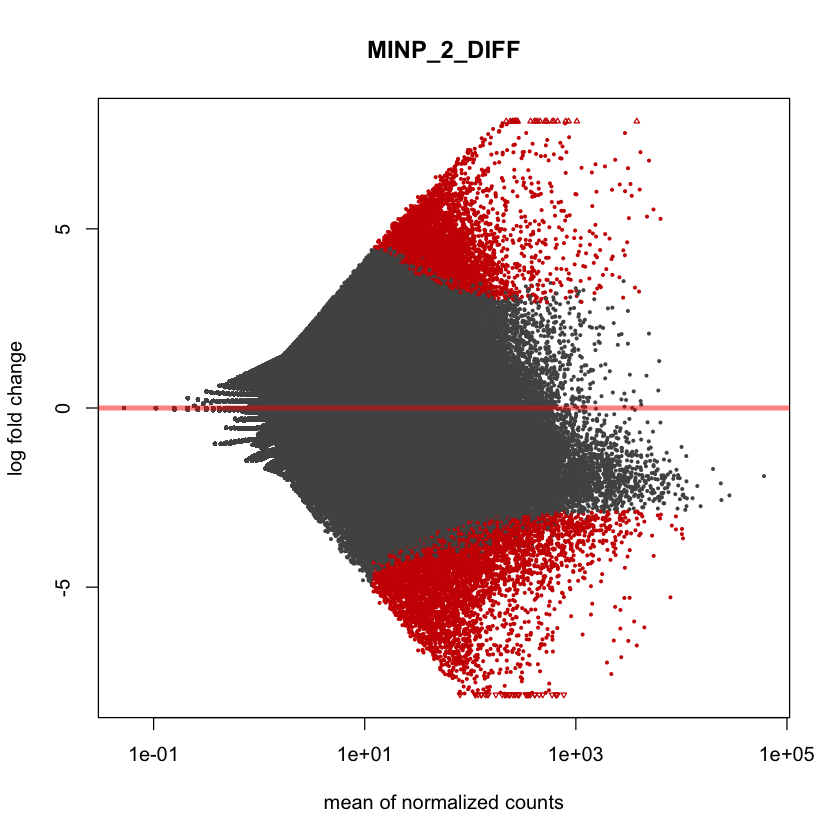

In [16]:
dds_minp_2 <- DESeq(dds_minp_2)
res_minp_2_hepg2 <- results(dds_minp_2, addMLE = TRUE, contrast=c('condition',
                                            'hepg2-rna', 'dna'))
res_minp_2_k562 <- results(dds_minp_2, addMLE = TRUE, contrast=c('condition',
                                            'k562-rna', 'dna'))
res_minp_2_diff <- results(dds_minp_2, addMLE = TRUE, contrast=c('condition',
                                            'hepg2-rna', 'k562-rna'))
plotMA(res_minp_2_hepg2, main="MINP_2_HEPG2", ylim=c(-8,8))
plotMA(res_minp_2_k562,  main="MINP_2_K562",  ylim=c(-8,8))
plotMA(res_minp_2_diff,  main="MINP_2_DIFF",  ylim=c(-8,8))

In [18]:
write.table(res_minp_1_hepg2, file = paste(OUT_DIR, 'ScaleUpDesign1-MINP-HepG2.deseq', sep = '/'), sep = '\t')
write.table(res_minp_2_hepg2, file = paste(OUT_DIR, 'ScaleUpDesign2-MINP-HepG2.deseq', sep = '/'), sep = '\t')
write.table(res_minp_1_k562,  file = paste(OUT_DIR, 'ScaleUpDesign1-MINP-K562.deseq',  sep = '/'), sep = '\t')
write.table(res_minp_2_k562,  file = paste(OUT_DIR, 'ScaleUpDesign2-MINP-K562.deseq',  sep = '/'), sep = '\t')

write.table(res_sv40p_1_hepg2, file = paste(OUT_DIR, 'ScaleUpDesign1-SV40P-HepG2.deseq', sep = '/'), sep = '\t')
write.table(res_sv40p_2_hepg2, file = paste(OUT_DIR, 'ScaleUpDesign2-SV40P-HepG2.deseq', sep = '/'), sep = '\t')
write.table(res_sv40p_1_k562,  file = paste(OUT_DIR, 'ScaleUpDesign1-SV40P-K562.deseq',  sep = '/'), sep = '\t')
write.table(res_sv40p_2_k562,  file = paste(OUT_DIR, 'ScaleUpDesign2-SV40P-K562.deseq',  sep = '/'), sep = '\t')